在应用各种复杂的模型之前，首先确定好整个系统的框架更为重要。

在framework板块，首先将介绍整个训练过程从数据筛选到最后回测所用的各个阶段，并且将这些处理都封装进不同的类里面以便不同的模型调用



1. 原始价格数据 通过"特征和标签的筛选和构建.ipynb" 转化为筛选的特征和标签

2. 筛选的特征和标签通过 TestSplit 类划分为随机训练集、验证集、测试集数据

3. 随机训练集、验证集、测试集数据通过 CallableDataset 类封装为结构化的训练集、验证集、测试集数据

4. 通过 HybridDecoder 类定义模型

4. 通过 HybridLoss 类定义损失函数

5. 通过 PredictionRecoder 类记录预测结果

6. 通过 Animator类监控训练过程

7. 通过ModelTrain类 封装训练过程

8. 通过BackTest类 回测模型预测效果

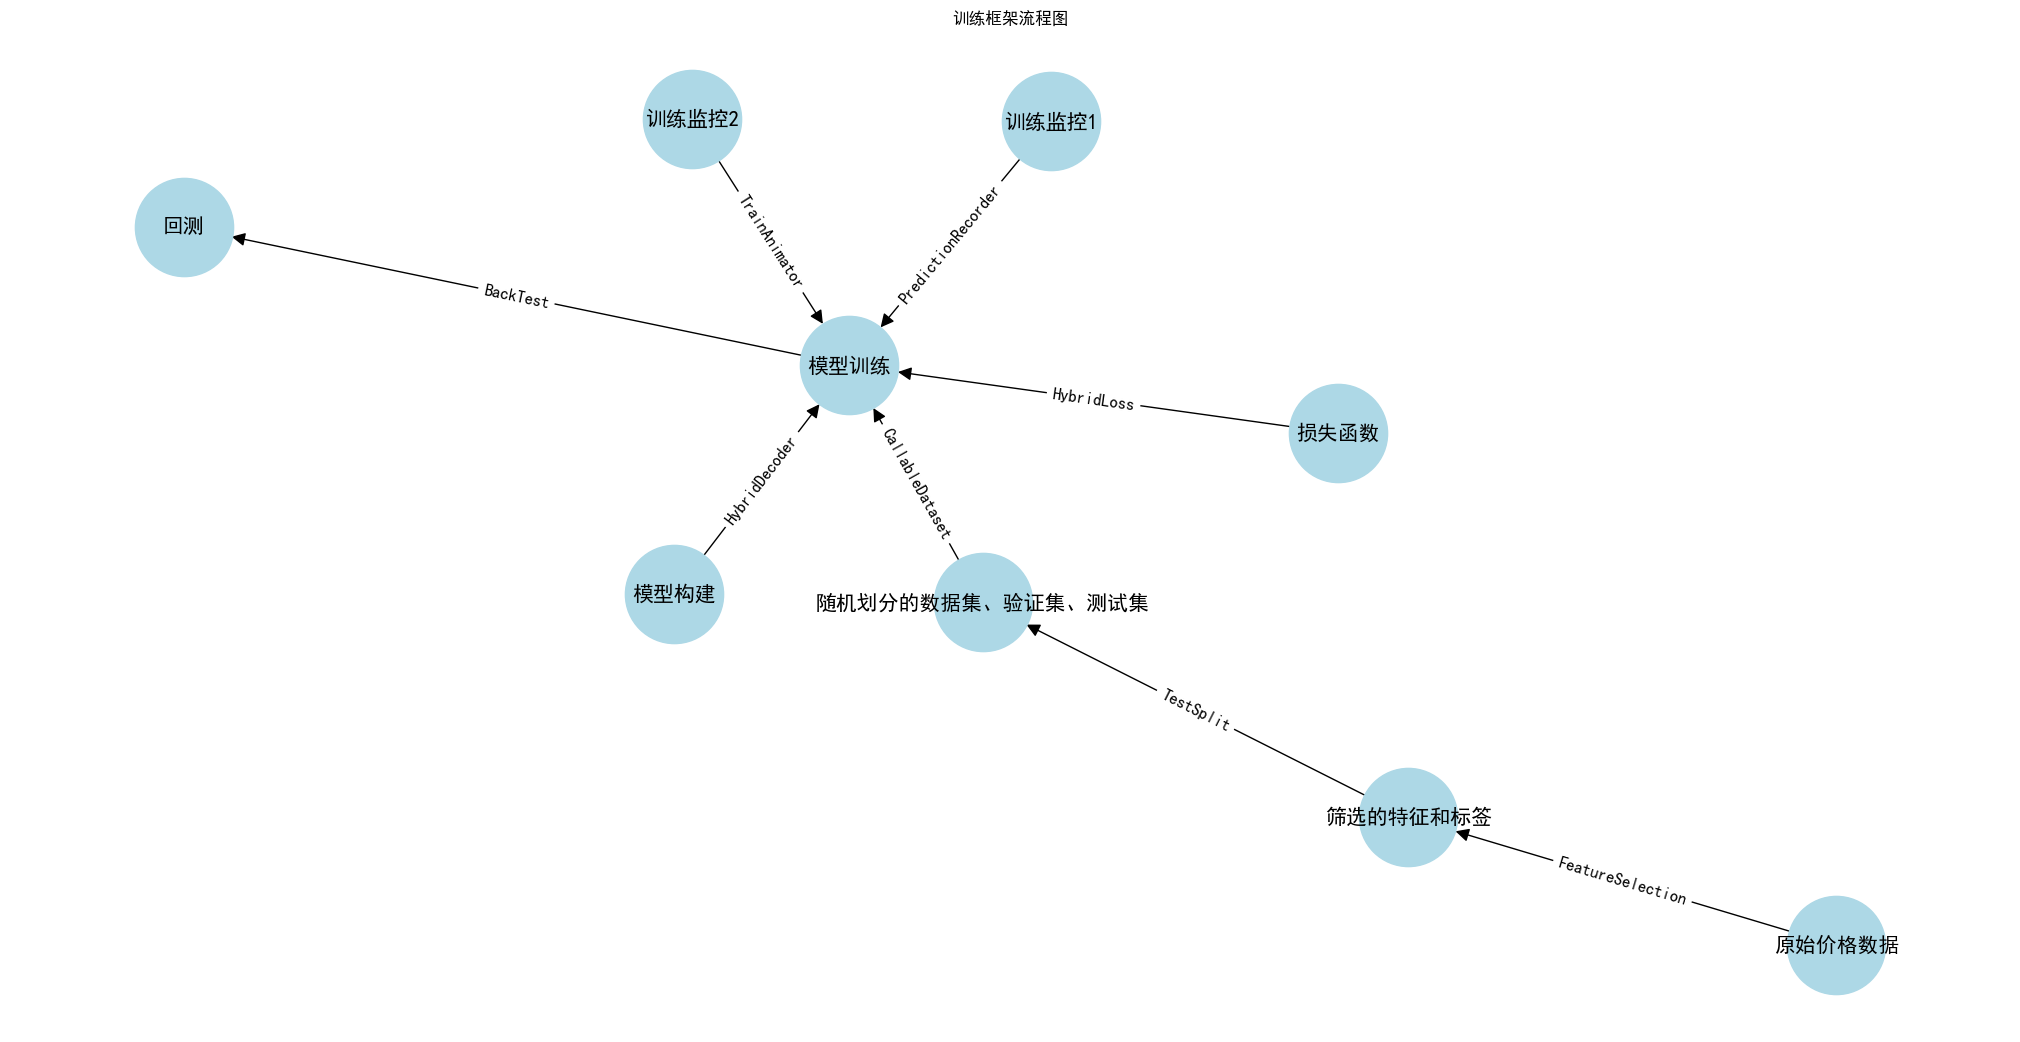

In [153]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans'] 
G = nx.DiGraph()

G.add_edge("原始价格数据", "筛选的特征和标签", label="FeatureSelection")
G.add_edge("筛选的特征和标签", "随机划分的数据集、验证集、测试集", label="TestSplit")
G.add_edge("随机划分的数据集、验证集、测试集", "模型训练", label="CallableDataset")
G.add_edge("模型构建", "模型训练", label = 'HybridDecoder')
G.add_edge("损失函数", "模型训练", label = 'HybridLoss')
G.add_edge("训练监控1", "模型训练", label = 'PredictionRecorder')
G.add_edge("训练监控2", "模型训练", label = 'TrainAnimator')
G.add_edge("模型训练", "回测", label = 'BackTest')

pos = nx.spring_layout(G, seed = 4)
plt.figure(figsize=(20, 10))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=15, font_weight="bold", arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=12)
plt.title("训练框架流程图")
plt.axis('off')
plt.show()